In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

import scikitplot as skplt

import tensorflow as tf

In [22]:
df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trtbps      20.0
chol        63.5
fbs          0.0
restecg      1.0
thalachh    32.5
exng         1.0
oldpeak      1.6
slp          1.0
caa          1.0
thall        1.0
output       1.0
dtype: float64


In [28]:
for i in df.select_dtypes(include=['object']):
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])

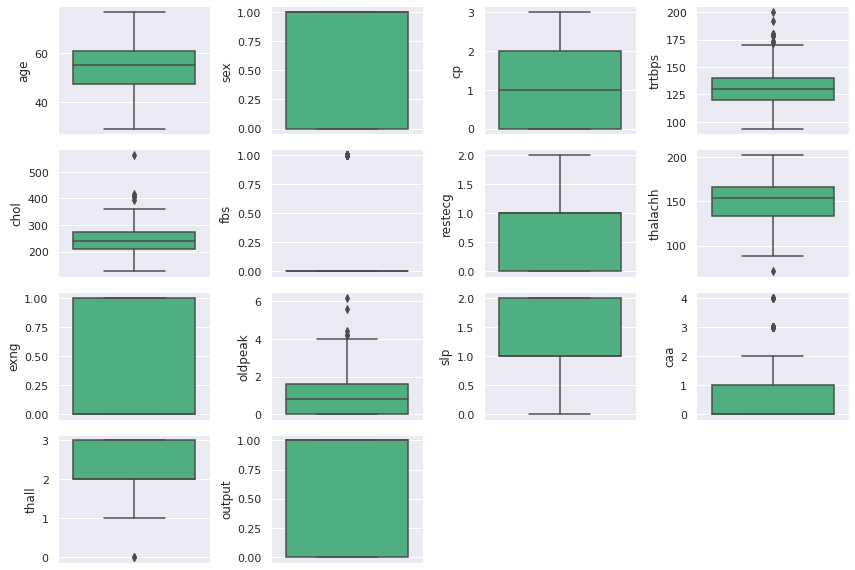

In [29]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i],color='#40bf80')

plt.tight_layout()
plt.show()

In [30]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1=np.percentile(df[c],25)
        
        Q3=np.percentile(df[c],75)
        
        IQR= Q3-Q1
        
        outlier_step= IQR * 1.5
        
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [31]:
df= df.drop(detect_outliers(df,['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']),axis = 0).reset_index(drop = True)

In [32]:
X = df.drop("output",axis=1).values
y = df["output"].values

In [33]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = st.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

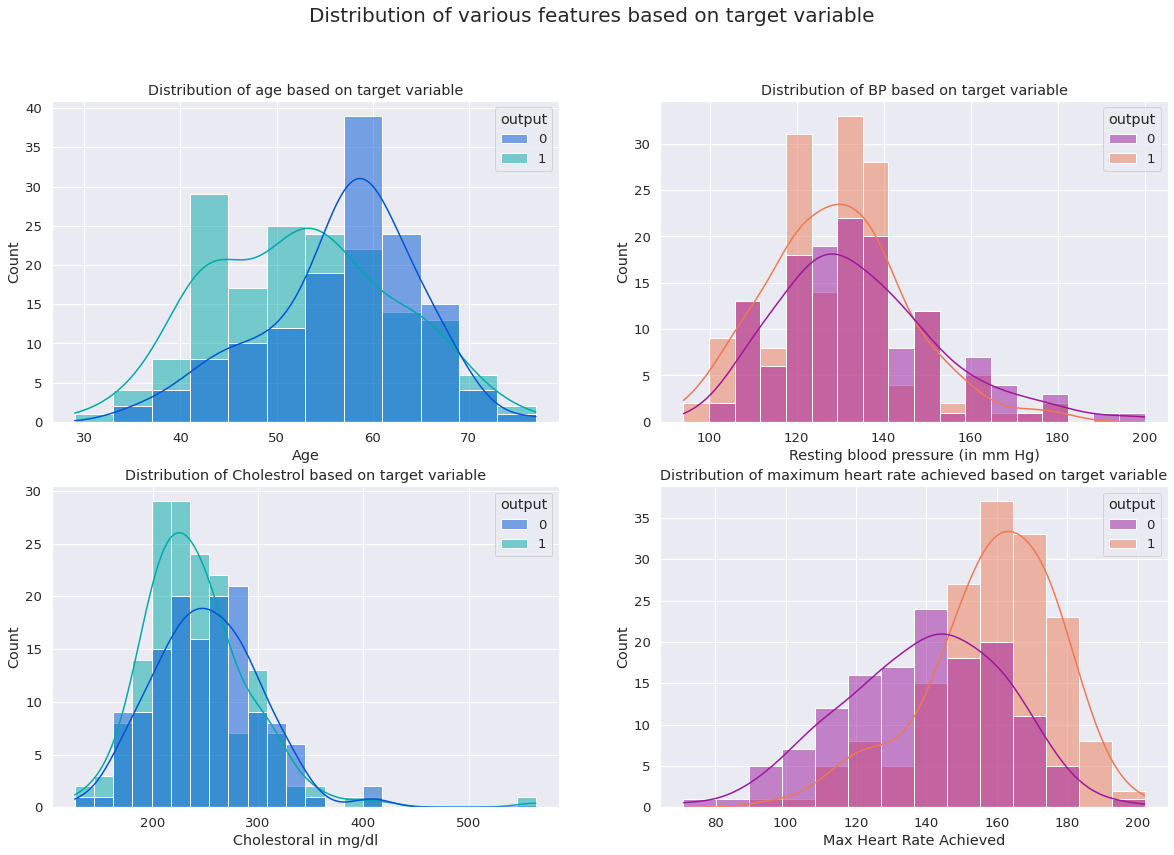

In [34]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= df, hue= 'output', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trtbps', data= df, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= df, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalachh', data= df, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

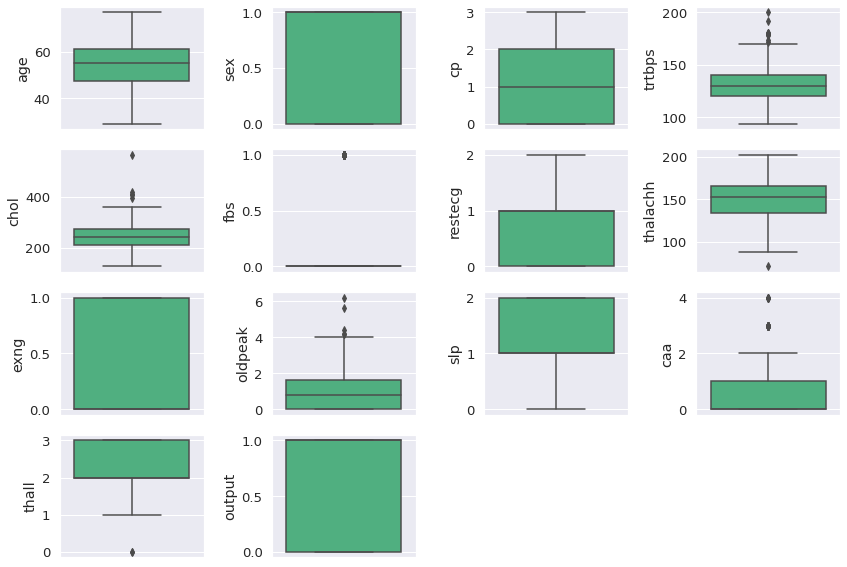

In [35]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i],color='#40bf80')

plt.tight_layout()
plt.show()

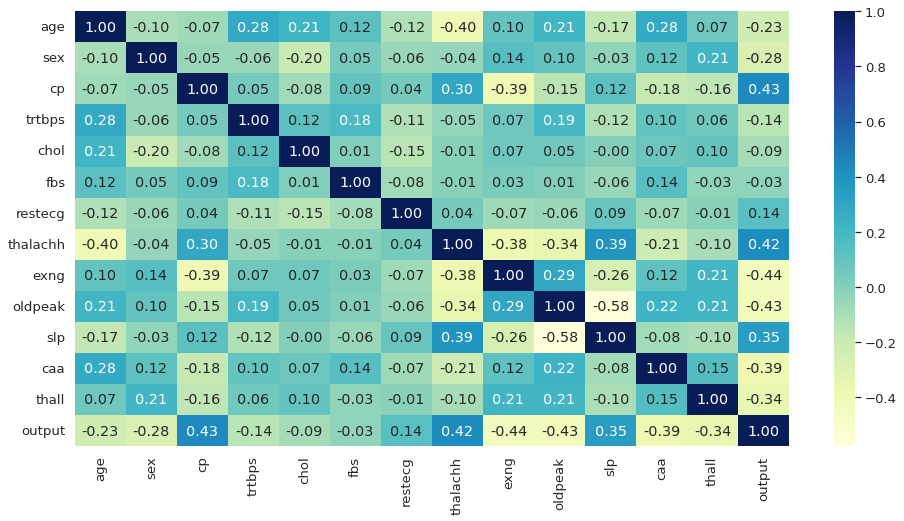

In [36]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

In [37]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

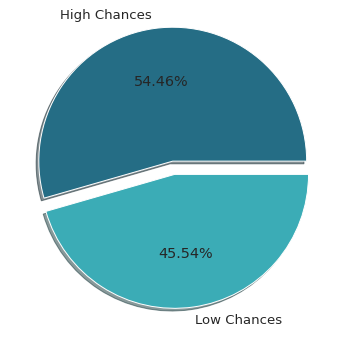

In [38]:
plt.figure(figsize= (6, 8))
data_pie  = [165 , 138]
labels = ["High Chances", "Low Chances"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.show()

In [43]:
data = pd.get_dummies(df, drop_first=True)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
X = data.drop('output', axis= 1)
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20,random_state= 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)

(242, 13)


In [48]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=[13]
        ),
        keras.layers.Dense(515, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               3584      
_________________________________________________________________
dense_5 (Dense)              (None, 515)               132355    
_________________________________________________________________
dropout_2 (Dropout)          (None, 515)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                25800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 161,790
Trainable params: 161,790
Non-trainable params: 0
________________________________________________

In [50]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping( patience = 20, min_delta = 0.001,
                                               restore_best_weights =True )
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=15,
    epochs=50,
    callbacks = [early_stopping],
    verbose=1, 
)

Epoch 1/50
17/17 [==============================] - 1s 20ms/step - loss: 0.5146 - binary_accuracy: 0.7645 - val_loss: 0.3673 - val_binary_accuracy: 0.8852
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 0.3843 - binary_accuracy: 0.8430 - val_loss: 0.3859 - val_binary_accuracy: 0.8852
Epoch 3/50
17/17 [==============================] - 0s 8ms/step - loss: 0.3212 - binary_accuracy: 0.8760 - val_loss: 0.3967 - val_binary_accuracy: 0.8689
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.2885 - binary_accuracy: 0.8926 - val_loss: 0.4383 - val_binary_accuracy: 0.8525
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 0.2624 - binary_accuracy: 0.8884 - val_loss: 0.4054 - val_binary_accuracy: 0.8852
Epoch 6/50
17/17 [==============================] - 0s 6ms/step - loss: 0.2501 - binary_accuracy: 0.9091 - val_loss: 0.4684 - val_binary_accuracy: 0.8689
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2

In [51]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3673 - binary_accuracy: 0.8852


[0.3672514855861664, 0.8852459192276001]

In [52]:
predictions =(model.predict(X_test)>0.5).astype("int32")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)

0.8852459016393442

In [53]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

